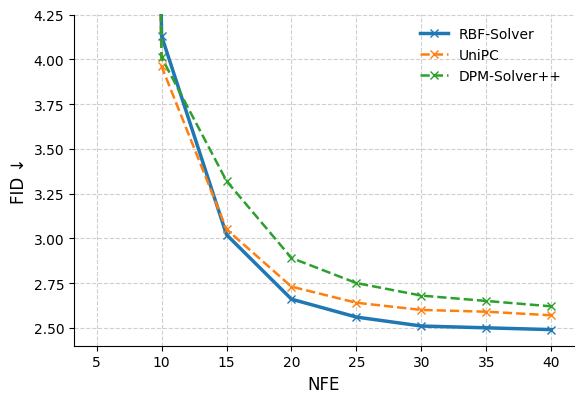

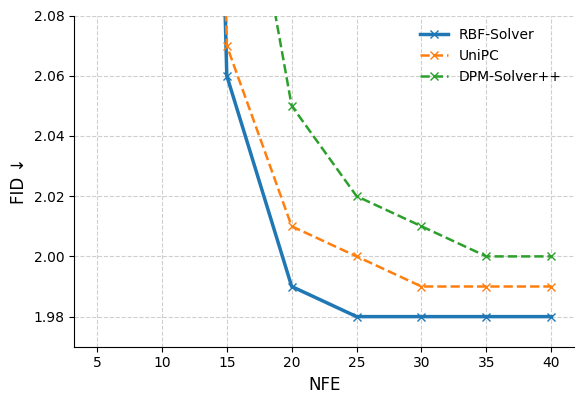

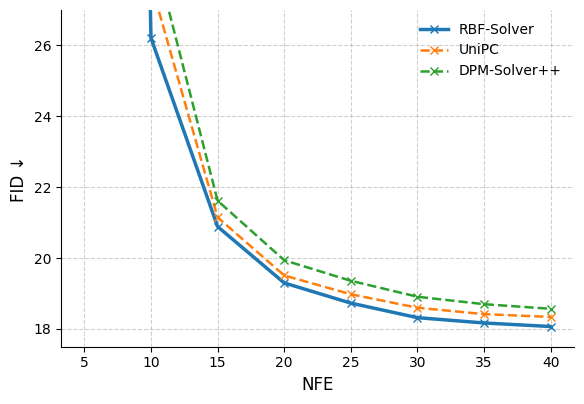

In [10]:
import matplotlib.pyplot as plt

# ─────────────────── 공통 설정 ───────────────────
plt.rcParams.update({
    "font.size":        12,
    "axes.labelsize":   12,
    "xtick.labelsize":  10,
    "ytick.labelsize":  10,
    "legend.fontsize":  10,
    "axes.grid":        True,
    "grid.linestyle":   "--",
    "grid.alpha":       0.6,
    "axes.spines.top":  False,
    "axes.spines.right":False,
})

nfe = [5, 10, 15, 20, 25, 30, 35, 40]

# ───────── 데이터 ─────────
scores = {
    "CIFAR10_ScoreSDE": {
        "RBF-Solver":   [26.65, 4.13, 3.02, 2.66, 2.56, 2.51, 2.50, 2.49],
        "UniPC":        [23.69, 3.96, 3.05, 2.73, 2.64, 2.60, 2.59, 2.57],
        "DPM-Solver++": [28.50, 4.01, 3.32, 2.89, 2.75, 2.68, 2.65, 2.62],
    },
    "CIFAR10_EDM": {
        "RBF-Solver":   [22.25, 2.88, 2.06, 1.99, 1.98, 1.98, 1.98, 1.98],
        "UniPC":        [23.52, 2.85, 2.07, 2.01, 2.00, 1.99, 1.99, 1.99],
        "DPM-Solver++": [24.54, 2.91, 2.17, 2.05, 2.02, 2.01, 2.00, 2.00],
    },
    "ImageNet64": {
        "RBF-Solver":   [116.83, 26.21, 20.89, 19.30, 18.73, 18.32, 18.17, 18.07],
        "UniPC":        [109.81, 27.75, 21.15, 19.51, 18.98, 18.60, 18.42, 18.34],
        "DPM-Solver++": [110.23, 28.95, 21.62, 19.94, 19.36, 18.91, 18.70, 18.57],
    },
}

# 각 그래프별 y-축 범위
ylims = {
    "CIFAR10_ScoreSDE": (2.4, 4.25),
    "CIFAR10_EDM":      (1.97, 2.08),
    "ImageNet64":       (17.5, 27.0),
}

# ───────── 그래프 개별 출력 ─────────
for key in ["CIFAR10_ScoreSDE", "CIFAR10_EDM", "ImageNet64"]:
    plt.figure(figsize=(6, 4.2))            # 새 Figure
    for model, vals in scores[key].items():
        lw = 2.5 if "RBF" in model else 1.8
        ls = "-"  if "RBF" in model else "--"
        plt.plot(nfe, vals, marker="x", linewidth=lw, linestyle=ls, label=model)
    plt.xlabel("NFE")
    plt.ylabel("FID ↓")
    plt.xticks(nfe)
    plt.ylim(*ylims[key])
    plt.legend(frameon=False, loc="upper right")
    plt.tight_layout()
    plt.show()
